In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import seaborn as sns

#ploltly
from plotly.offline import init_notebook_mode, iplot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/makine öğrenmesi/veri-seti.txt", delimiter="\t", header=None,
                 names=["Pregnacies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

In [ ]:
df.head()

,Pregnacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def analız(dataframe):
    print("************* TYPE  **************")
    print(dataframe.dtypes)
    print("************* INFO  **************")
    print(dataframe.info())
    print("************* SHAPE **************")
    print(dataframe.shape)
    print("************* NA  **************")
    print(dataframe.isnull().sum())

analız(df)

************* TYPE  **************
Pregnacies                    int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
************* INFO  **************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnacies                768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    f

In [ ]:
df.describe(percentiles=[0,0.05,0.95,0.99,1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Pregnacies,768.0,3.845052,3.369578,0.000,0.000,0.00000,3.0000,10.00000,13.00000,17.00,17.00
Glucose,768.0,120.894531,31.972618,0.000,0.000,79.00000,117.0000,181.00000,196.00000,199.00,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.000,38.70000,72.0000,90.00000,106.00000,122.00,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,44.00000,51.33000,99.00,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,293.00000,519.90000,846.00,846.00
BMI,768.0,31.992578,7.884160,0.000,0.000,21.80000,32.0000,44.39500,50.75900,67.10,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.078,0.14035,0.3725,1.13285,1.69833,2.42,2.42
Age,768.0,33.240885,11.760232,21.000,21.000,21.00000,29.0000,58.00000,67.00000,81.00,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.00000,1.00,1.00


In [ ]:
num_cols = df.columns.tolist()
num_cols.remove('Outcome')
num_cols

['Pregnacies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

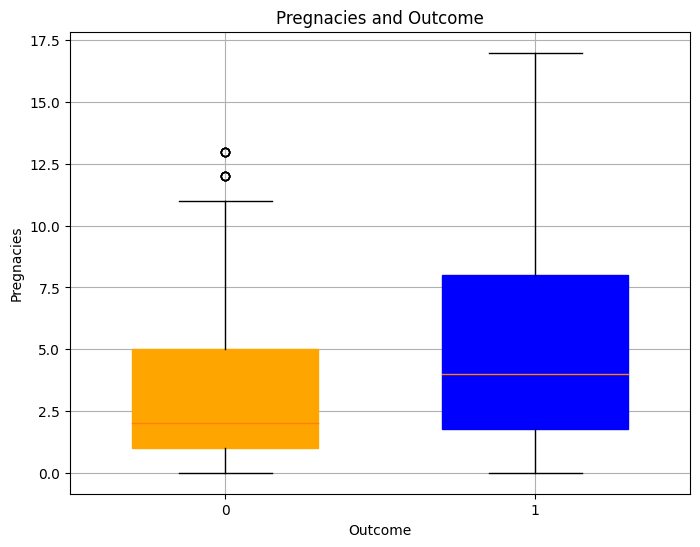

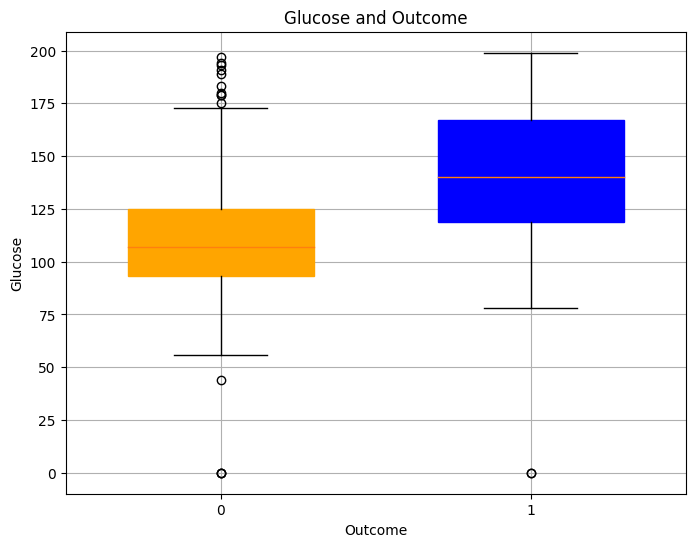

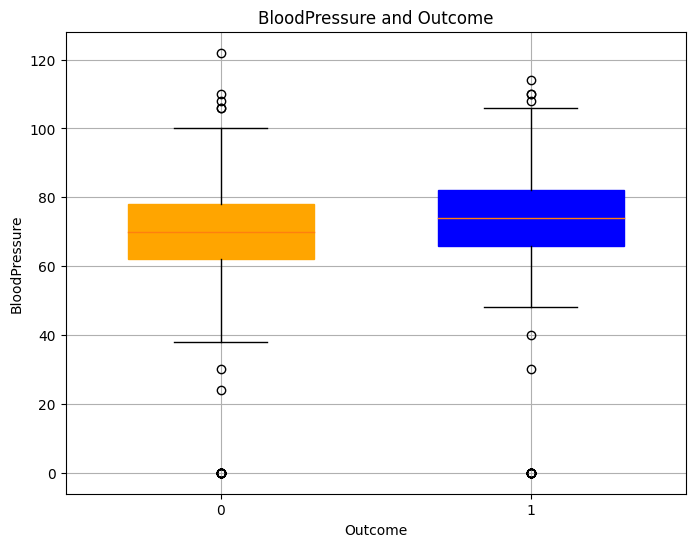

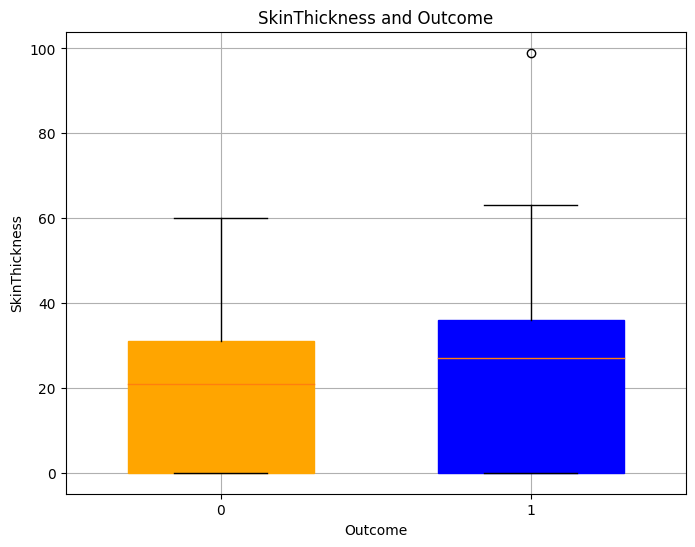

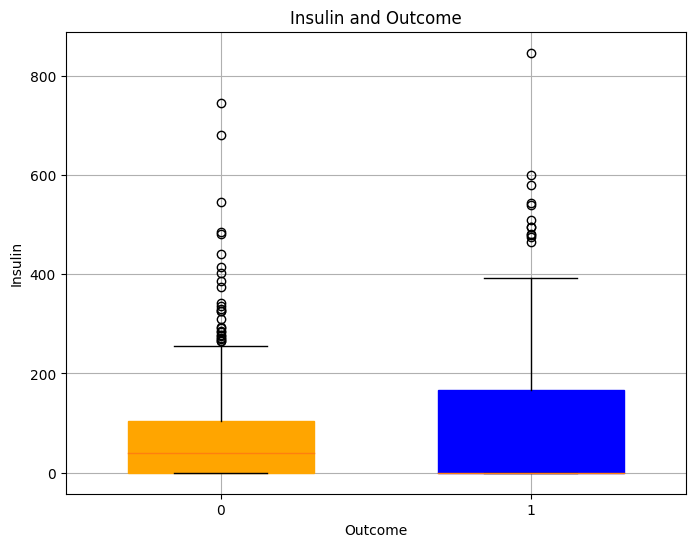

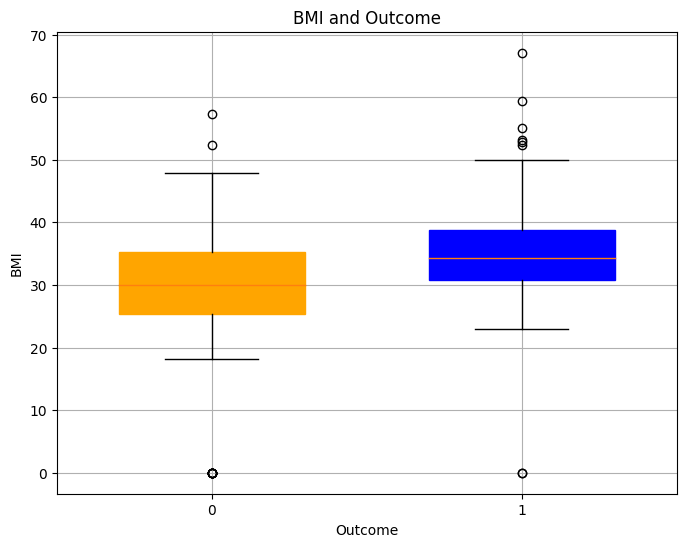

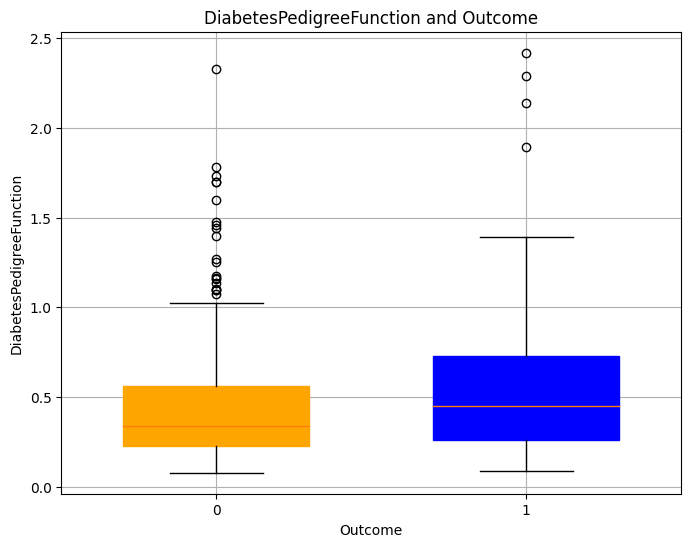

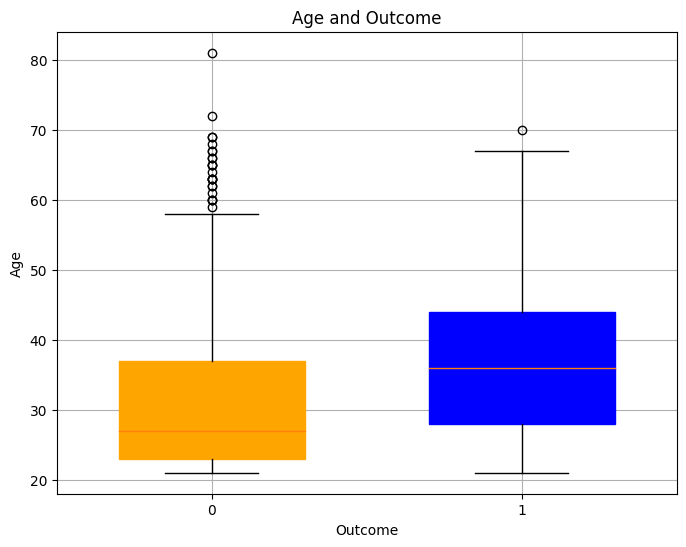

In [ ]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for col in num_cols:
    plt.figure(figsize=(8, 6))
    for outcome_value, color in zip(df['Outcome'].unique(), colors):
        subset = df[df['Outcome'] == outcome_value]
        plt.boxplot(subset[col], positions=[outcome_value], widths=0.6, patch_artist=True, boxprops=dict(facecolor=color, color=color))
    plt.xlabel('Outcome')
    plt.ylabel(col)
    plt.title('{} and Outcome'.format(col))
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Naive Bayes ve GridSearchCV ile Optimizasyon

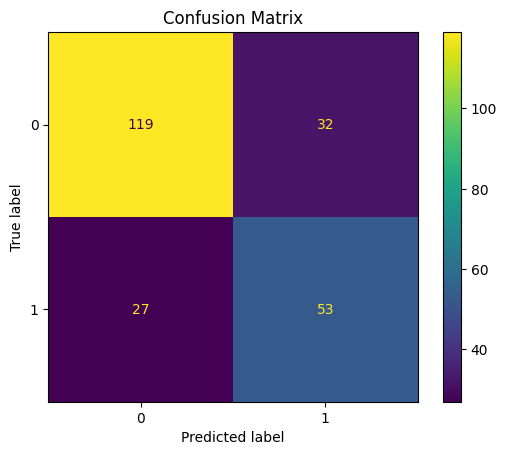

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



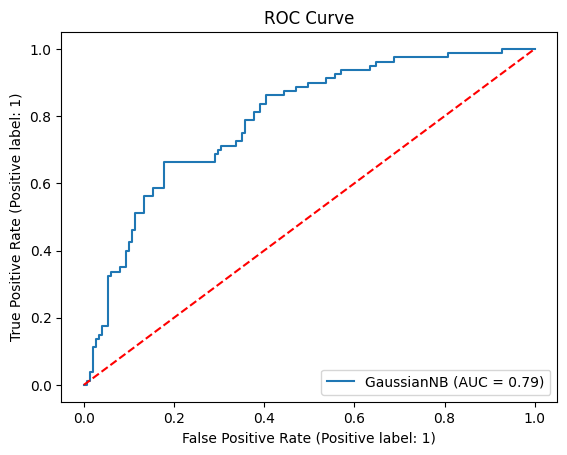

In [ ]:
nbc_model = GaussianNB().fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = nbc_model.predict(X_test)
y_prob = nbc_model.predict_proba(X_test)[:, 1]

# Confusion Matrix'i çizin
ConfusionMatrixDisplay.from_estimator(nbc_model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma metriklerini hesaplayın ve yazdırın
print(classification_report(y_test, y_pred))

# ROC eğrisini çizin
roc_display = RocCurveDisplay.from_estimator(nbc_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

**Sınıf 0 (Negatif Sınıf)**
* Precision (0.82): Sınıf 0 için yapılan pozitif tahminlerin %82'si doğru.
* Recall (0.79): Sınıf 0 örneklerinin %79'u doğru tahmin edilmiş.
* F1-Score (0.80): Precision ve Recall'un harmonik ortalaması 0.80.
* Support (151): Sınıf 0'a ait toplam 151 örnek var.

**Sınıf 1 (Pozitif Sınıf)**
* Precision (0.62): Sınıf 1 için yapılan pozitif tahminlerin %62'si doğru.
* Recall (0.66): Sınıf 1 örneklerinin %66'sı doğru tahmin edilmiş.
* F1-Score (0.64): Precision ve Recall'un harmonik ortalaması 0.64.
* Support (80): Sınıf 1'e ait toplam 80 örnek var.

Accuracy (0.74): Modelin genel doğruluğu %74.
Sınıf 0 için modelimiz oldukça iyi performans gösteriyor, precision ve recall değerleri yüksek.
Sınıf 1 için modelimiz performansı biraz daha düşük. Precision ve recall değerleri sınıf 0'a göre daha düşük. Bu durum, sınıf 1'de yanlış negatif ve yanlış pozitif oranlarının daha yüksek olabileceğini gösteriyor.
Genel doğruluk (accuracy) %74 ile makul bir seviyede.
AUC değeri 0.79 ile makul bir seviyede, modelin iyi bir ayırt edici yeteneğe sahip olduğunu gösteriyor. Ancak, sınıf 1'deki performans artışı ile genel performans daha da iyileştirilebilir.

Best parameters found:  {'var_smoothing': 0.1}
Best cross-validation accuracy: 0.76


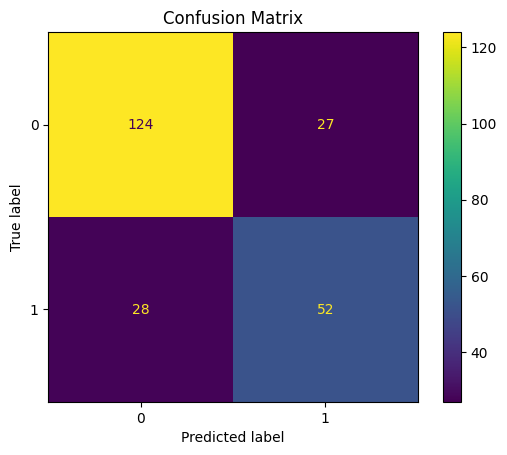

Mean Squared Error (MSE): 0.23809523809523808
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       151
           1       0.66      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



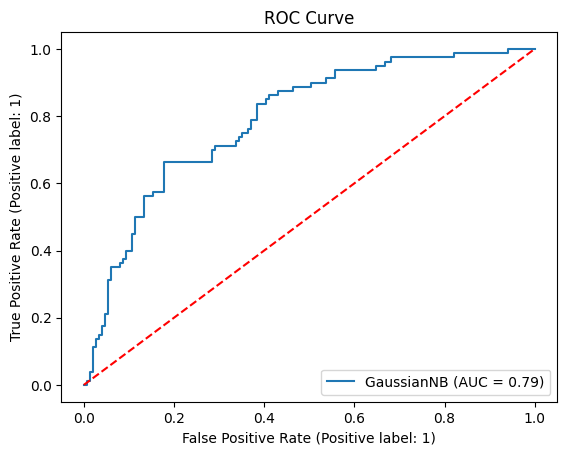

In [ ]:
# Hiperparametre gridini tanımlayın
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
}

# GridSearchCV'yi oluşturun
grid_search = GridSearchCV(estimator=nbc_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Eğitim verisi ile GridSearchCV'yi eğitin
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi modeli yazdırın
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# En iyi model ile tahmin yapın
best_nbc_model = grid_search.best_estimator_
y_pred = best_nbc_model.predict(X_test)
y_prob = best_nbc_model.predict_proba(X_test)[:, 1]

# Confusion Matrix'i çizin
ConfusionMatrixDisplay.from_estimator(best_nbc_model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

# Hata matrisini hesaplayın
conf_matrix = confusion_matrix(y_test, y_pred)

# Hata matrisinden MSE'yi hesaplayın (manuel olarak)
total_misclassifications = sum(sum(conf_matrix))
mse = sum(sum(conf_matrix * (1 - np.eye(conf_matrix.shape[0])))) / total_misclassifications

print("Mean Squared Error (MSE):", mse)


# Sınıflandırma metriklerini hesaplayın ve yazdırın
print(classification_report(y_test, y_pred))

# ROC eğrisini çizin
roc_display = RocCurveDisplay.from_estimator(best_nbc_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

Daha iyi bir sonuç için hiperparametre optimizasyonunu GriedSearchCV ile yaparak en iyi var_smoothing değerini bulmaya çalışıyoruz.

**var_smoothing:**
* Gaussian Naive Bayes, verilerin normal dağılım varsayımı altında sınıflandırılmasını sağlar. Ancak, bazı durumlarda verilerin varyansları çok küçük olabilir veya sıfıra yakın olabilir. Bu durumlar modelin kararlılığını ve performansını olumsuz etkileyebilir. İşte bu noktada var_smoothing devreye girer.

Burada en iyi var_smoothing değer
 0.1 çıktı. bu şekilde modelimizi tekrar eğittiğimizde;
 * acc: 0.76 çıkarmış olduk.

Modelinizde ekstra MSE değerine baktık. MSE değeri 0.238 çıktı. Bu değer mdelin hata oranının nispeten düşük olduğunu ve tahminlerin genel olarak gerçek değerlere yakın olduğunu gösteriyor.

# K-NN ve GridSearchCV ile Optimizasyon

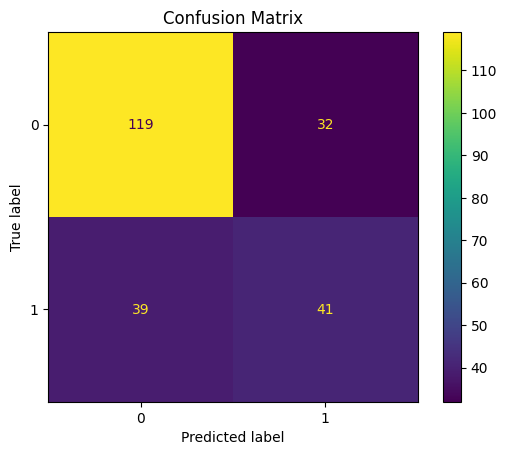

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231



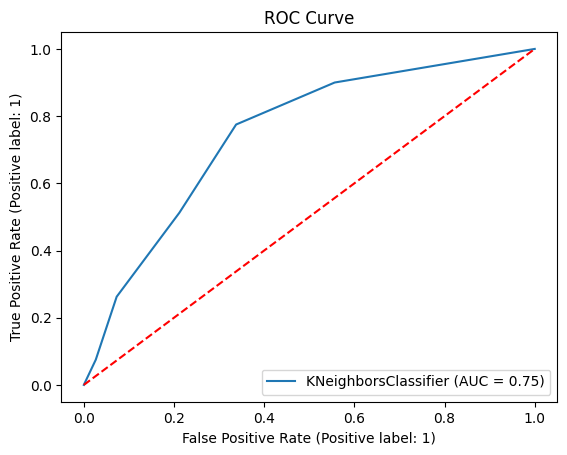

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # k değeri olarak 5 seçilmiştir, ihtiyaca göre değiştirilebilir
knn_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

# Confusion Matrix'i çizin
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma metriklerini hesaplayın ve yazdırın
print(classification_report(y_test, y_pred))

# ROC eğrisini çizin
roc_display = RocCurveDisplay.from_estimator(knn_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

**Sınıf 0 (Negatif Sınıf)**
* Precision (0.75): Sınıf 0 için yapılan pozitif tahminlerin %75'i doğru.
* Recall (0.79): Sınıf 0 örneklerinin %79'u doğru tahmin edilmiş.
* F1-Score (0.77): Precision ve Recall'un harmonik ortalaması 0.77.
* Support (151): Sınıf 0'a ait toplam 151 örnek var.

**Sınıf 1 (Pozitif Sınıf)**
* Precision (0.56): Sınıf 1 için yapılan pozitif tahminlerin %56'si doğru.
* Recall (0.51): Sınıf 1 örneklerinin %51'i doğru tahmin edilmiş.
* F1-Score (0.54): Precision ve Recall'un harmonik ortalaması 0.54.
* Support (80): Sınıf 1'e ait toplam 80 örnek var.

Accuracy (0.69): Modelin genel doğruluğu %69. Acc %69 ile makul bir seviyede, ancak sınıf 1'in performansının düşük olması genel performansı düşürmekte. Sınıf 1'in performansının düşük olmasının bir nedeni, sınıflar arasındaki dengesizlik olabilir. Sınıf 1'e ait örnek sayısı, sınıf 0'a göre daha az.ROC eğrisinin altındaki alan 0.75. Bu, modelin sınıflandırma performansının iyi olduğunu gösterir. AUC değeri 1'e ne kadar yakınsa, model o kadar iyi performans gösterir.

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Best cross-validation accuracy: 0.78


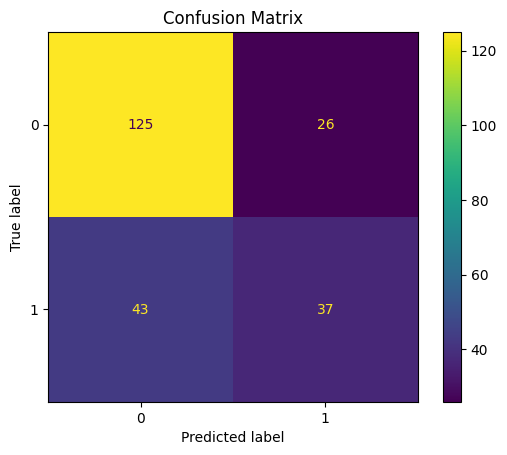

Mean Squared Error (MSE): 0.2987012987012987
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       151
           1       0.59      0.46      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



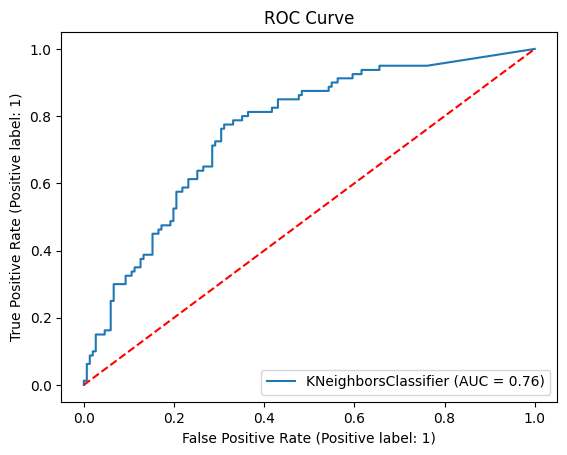

In [ ]:
# KNN modelini oluşturun
knn_model = KNeighborsClassifier()

# Hiperparametre gridini tanımlayın
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV'yi oluşturun
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Eğitim verisi ile GridSearchCV'yi eğitin
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi modeli yazdırın
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# En iyi model ile tahmin yapın
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)
y_prob = best_knn_model.predict_proba(X_test)[:, 1]

# Confusion Matrix'i çizin
ConfusionMatrixDisplay.from_estimator(best_knn_model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

# Hata matrisini hesaplayın
conf_matrix = confusion_matrix(y_test, y_pred)

# Hata matrisinden MSE'yi hesaplayın (manuel olarak)
total_misclassifications = sum(sum(conf_matrix))
mse = sum(sum(conf_matrix * (1 - np.eye(conf_matrix.shape[0])))) / total_misclassifications

print("Mean Squared Error (MSE):", mse)

# Sınıflandırma metriklerini hesaplayın ve yazdırın
print(classification_report(y_test, y_pred))

# ROC eğrisini çizin
roc_display = RocCurveDisplay.from_estimator(best_knn_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

Modelimizin daha iyi bir sonuç verebilmesi için NaiveBayeste kullandığımız GriedSearchCV ile hiperparametre optimizasyonu yapıyoruz.
* En yankın komşu değerini yani n_neighbors belirliyoruz.
* weights parametresine bakıyoruz. KNN algoritmasında komşuların nasıl ağırlıklandırılacağını belirler. Uniform tüm komşuları eşit ağırlıkta, distance ise Komşuların ağırlıkları, uzaklıklarına göre ters orantılıdır.
* metric parametresi, KNN algoritmasında uzaklık hesaplamalarında kullanılan metriği belirler. euclidean Öklidyen uzaklık metriği, iki nokta arasındaki düz çizgi mesafesini hesaplar, manhattan Manhattan uzaklık metriği, şehir blokları arasındaki mesafeyi hesaplar, minkowski Minkowski uzaklık metriği, hem Euclidean hem de Manhattan uzaklıklarının genel bir formudur.

Hiperparametre yaptıktan sonra acc değerimiz 0.7'e kadar çıkarabildik. Tabi bazı metrikleri daha değiştirerek daha iyi sonuçlar alabiliriz. MSE değerimiz ise 0.298 çıkıyor.

# MLP ve GridSearchCV ile Optimizasyon

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



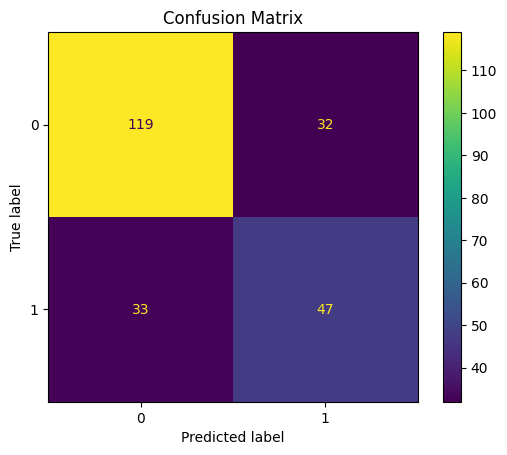

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       151
           1       0.59      0.59      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



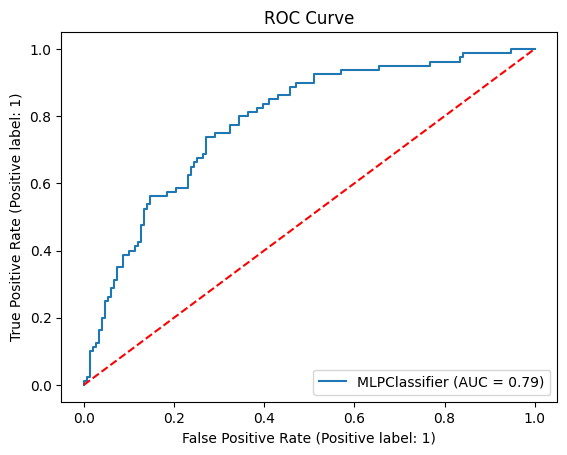

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = mlp_model.predict(X_test)
y_prob = mlp_model.predict_proba(X_test)[:, 1]

# Confusion Matrix'i çizin
ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma metriklerini hesaplayın ve yazdırın
print(classification_report(y_test, y_pred))

# ROC eğrisini çizin
roc_display = RocCurveDisplay.from_estimator(mlp_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

**Sınıf 0 (Negatif Sınıf)**
* Precision (0.78): Sınıf 0 için yapılan pozitif tahminlerin %78'i doğru.
* Recall (0.79): Sınıf 0 örneklerinin %79'u doğru tahmin edilmiş.
* F1-Score (0.79): Precision ve Recall'un harmonik ortalaması 0.79.
* Support (151): Sınıf 0'a ait toplam 151 örnek var.

**Sınıf 1 (Pozitif Sınıf)**
* Precision (0.59): Sınıf 1 için yapılan pozitif tahminlerin %59'u doğru.
* Recall (0.59): Sınıf 1 örneklerinin %59'u doğru tahmin edilmiş.
* F1-Score (0.59): Precision ve Recall'un harmonik ortalaması 0.59.
* Support (80): Sınıf 1'e ait toplam 80 örnek var.

Accuracy modelin genel doğruluğu %72. ROC eğrisinin altındaki alan 0.79. Bu, modelin sınıflandırma performansının iyi olduğunu gösterir. AUC değeri 1'e ne kadar yakınsa, model o kadar iyi performans gösterir. Sınıf 0 için modeliniz oldukça iyi performans gösteriyor. Precision, recall ve F1-score değerleri yüksek ve dengeli.
Sınıf 1 için modelimizin performansı biraz daha düşük. Precision ve recall değerleri 0.59, bu da sınıf 1'de yanlış pozitif ve yanlış negatif oranlarının daha yüksek olabileceğini gösteriyor.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
Best cross-validation accuracy: 0.79


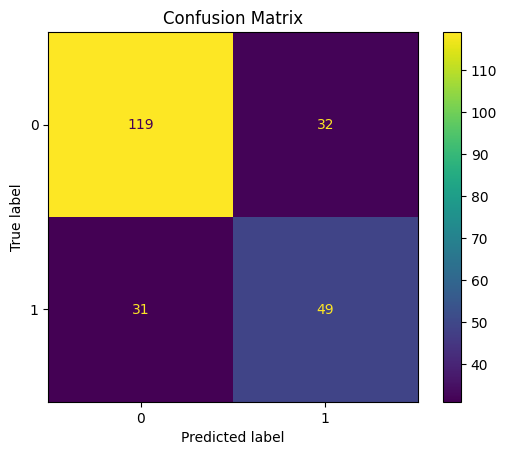

Mean Squared Error (MSE): 0.2727272727272727
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.60      0.61      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



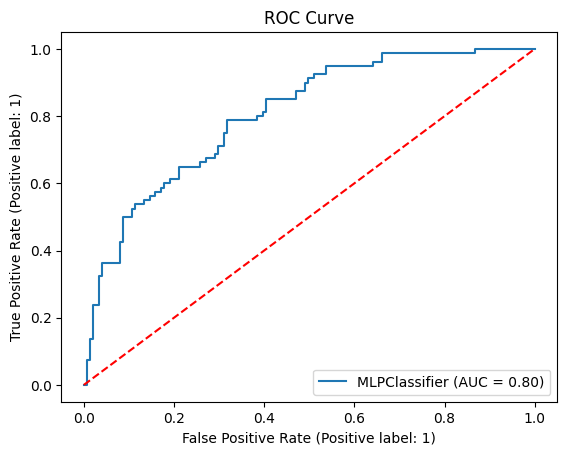

In [ ]:
# MLP modelini oluşturun
mlp_model = MLPClassifier(random_state=42)

# Hiperparametre gridini tanımlayın
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (100, 50), (150, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# GridSearchCV'yi oluşturun
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Eğitim verisi ile GridSearchCV'yi eğitin
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi modeli yazdırın
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# En iyi model ile tahmin yapın
best_mlp_model = grid_search.best_estimator_
y_pred = best_mlp_model.predict(X_test)
y_prob = best_mlp_model.predict_proba(X_test)[:, 1]

# Confusion Matrix'i çizin
ConfusionMatrixDisplay.from_estimator(best_mlp_model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)

# Hata matrisinden MSE'yi hesaplayın (manuel olarak)
total_misclassifications = sum(sum(conf_matrix))
mse = sum(sum(conf_matrix * (1 - np.eye(conf_matrix.shape[0])))) / total_misclassifications

print("Mean Squared Error (MSE):", mse)

# Sınıflandırma metriklerini hesaplayın ve yazdırın
print(classification_report(y_test, y_pred))

# ROC eğrisini çizin
roc_display = RocCurveDisplay.from_estimator(best_mlp_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

MLP modelimizde de en iyi sonuçları bulabilmek için GridSearchCV kullanacağız. Burada değiştireceğimiz parametreler;
* hidden_layer_sizes, gizli katmanların sayısını ve her katmandaki nöron sayısını belirler.
* activation, gizli katmanlarda kullanılacak olan aktivasyon fonksiyonunu belirler. 'tanh' Hiperbolik tanjant aktivasyon fonksiyonunu kullanır. Bu fonksiyon -1 ve 1 arasında değerler alır, 'relu' Rectified Linear Unit (ReLU) aktivasyon fonksiyonunu kullanır. Bu fonksiyon pozitif girişler için doğrusal, negatif girişler için sıfırdır.
* solver, ağırlıkları optimize etmek için kullanılacak algoritmayı belirler. 'sgd' Stokastik Gradyan İnişi (Stochastic Gradient Descent) kullanır, 'adam' Adaptive Moment Estimation (Adam) kullanır.
* alpha,  L2 norm cezası için düzenleme (regularization) terimini belirler. Overfitting'i önlemeye yardımcı olur.
* learning_rate, öğrenme oranının nasıl değiştirileceğini belirler.

Hiperparametre yaptıktan sonra en iyi değerlerimiz ile modelimizi eğittiğimizde acc 0.73 oldu. Parametrelerin aralıklarını açarak ve öznitelik çıkarımı veya ekleme yaparak daha iyi sonuçlar alınabilir. MSE değerimiz ise  0.272 çıkmaktadır.


# SVM ve GridSearchCV ile Optimizasyon

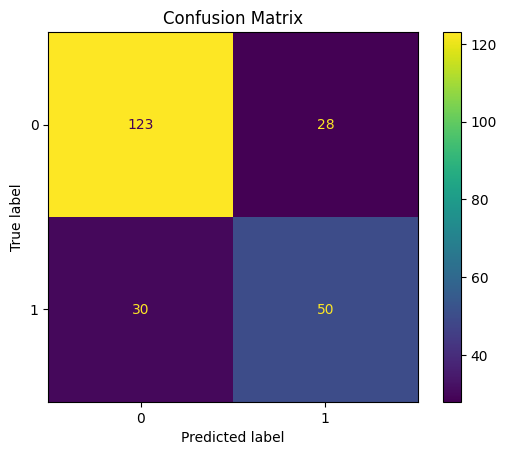

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



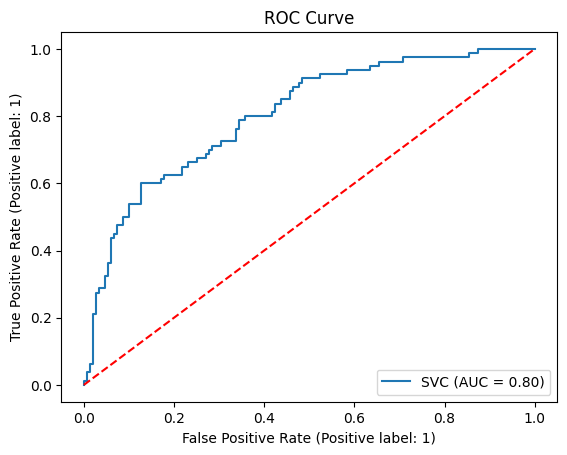

In [ ]:
# SVM modelini oluşturun ve eğitin
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Confusion Matrix'i çizin
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma metriklerini hesaplayın ve yazdırın
print(classification_report(y_test, y_pred))

# ROC eğrisini çizin
roc_display = RocCurveDisplay.from_estimator(svm_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

**Sınıf 0 (Negatif Sınıf)**
* Precision (0.80): Sınıf 0 için yapılan pozitif tahminlerin %80'i doğru.
* Recall (0.81): Sınıf 0 örneklerinin %81'i doğru tahmin edilmiş.
* F1-Score (0.81): Precision ve Recall'un harmonik ortalaması 0.81.
* Support (151): Sınıf 0'a ait toplam 151 örnek var.

**Sınıf 1 (Pozitif Sınıf)**
* Precision (0.64): Sınıf 1 için yapılan pozitif tahminlerin %64'ü doğru.
* Recall (0.62): Sınıf 1 örneklerinin %62'si doğru tahmin edilmiş.
* F1-Score (0.63): Precision ve Recall'un harmonik ortalaması 0.63.
* Support (80): Sınıf 1'e ait toplam 80 örnek var.

Accuracy modelin genel doğruluğu %75. Sınıf 0 için modeliniz oldukça iyi performans gösteriyor. Precision, recall ve F1-score değerleri yüksek ve dengeli.
Sınıf 1 için modelinizin performansı daha düşük. Precision ve recall değerleri 0.64 ve 0.62, bu da sınıf 1'de yanlış pozitif ve yanlış negatif oranlarının daha yüksek olabileceğini gösteriyor. AUC değerimiz 0.8, modelimizin sınıflandırma performansının oldukça iyi olduğunu gösterir.

Best parameters found:  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.78


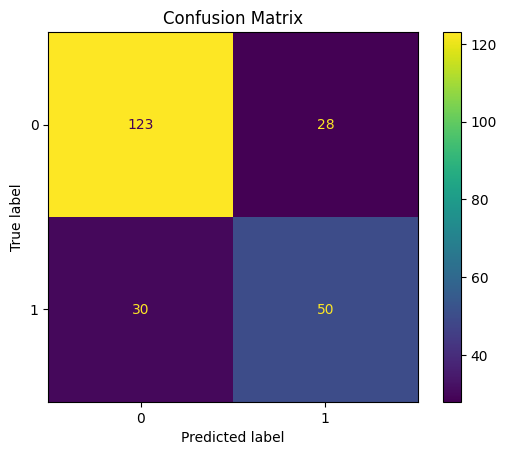

Mean Squared Error (MSE): 0.2510822510822511
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



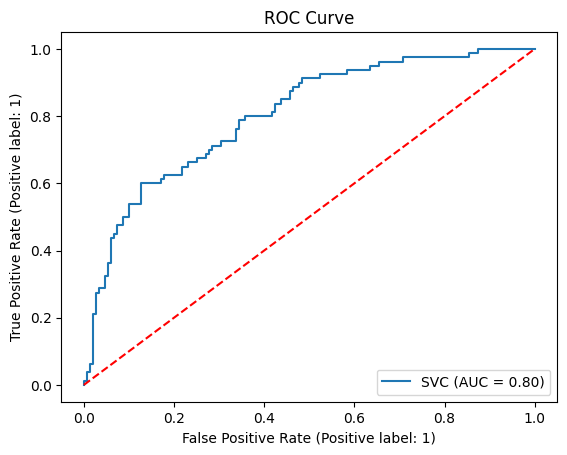

In [ ]:
# SVM modelini oluşturun
svm_model = SVC(random_state=42)

# Hiperparametre gridini tanımlayın
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# GridSearchCV'yi oluşturun
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Eğitim verisi ile GridSearchCV'yi eğitin
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi modeli yazdırın
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# En iyi model ile tahmin yapın
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

# Confusion Matrix'i çizin
ConfusionMatrixDisplay.from_estimator(best_svm_model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)

# Hata matrisinden MSE'yi hesaplayın (manuel olarak)
total_misclassifications = sum(sum(conf_matrix))
mse = sum(sum(conf_matrix * (1 - np.eye(conf_matrix.shape[0])))) / total_misclassifications

print("Mean Squared Error (MSE):", mse)

# Sınıflandırma metriklerini hesaplayın ve yazdırın
print(classification_report(y_test, y_pred))

# ROC eğrisini çizin
roc_display = RocCurveDisplay.from_estimator(best_svm_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

Hiperparametre optimizasyonun aşağıdaki parametrelerde yaptık.
* C, bir hata kabul etme derecesini kontrol eder. C değeri büyüdükçe, model karmaşıklığı artar ve eğitim verisetine daha fazla uyar. Ancak, aşırı uyuma (overfitting) neden olabilir.
* kernel, karar sınırlarını belirlemek için kullanılan fonksiyonu belirler, 'linear' doğrusal olarak ayrılabilir veriler için uygundur,'rbf' RBF (Radial Basis Function) doğrusal olarak ayrılabilir olmayan veriler için genellikle daha iyi çalışır , 'poly' Polinom derecesi degree parametresiyle belirlenir.
* gamma, RBF, poly, ve sigmoid kernel fonksiyonlarının düzenleme parametresidir. 'scale' Varsayılan değer. 1 / (n_features * X.var()) formülüne göre ölçeklendirilir. 'auto' 1 / n_features.
* degree, polinom kernel kullanılırken polinom derecesini belirler.

İlgili parametrelerle optimizasyon yaptıktan sonra acc 0.75 çıkmaktadır. MSE değeri ise 0.251 çıkmaktadır.

#En İyi Model

En iyi modelimiz NaiveBayes modelidir.